# **Customer Segmentation - Unsupervised Learning**

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import proplot
%matplotlib inline

In [33]:
%pip install proplot

## **Exploración de los datos** *(10 puntos)*

Los datos cargados contienen varias columnas, incluyendo información demográfica y de comportamiento de los clientes de tarjetas de crédito. Las columnas son:

1. **ID_Customer:** Identificador único del cliente.
2. **Customer_Age:** Edad del cliente.
3. **Gender:** Género del cliente.
4. **Dependent_count:** Número de dependientes.
5. **Income_Category:** Categoría de ingresos.
6. **Months_on_book:** Meses desde que el cliente está con el banco.
7. **Total_Relationship_Count:** Número total de productos del banco utilizados por el cliente.
8. **Months_Inactive_12_mon:** Meses de inactividad en los últimos 12 meses.
9. **Contacts_Count_12_mon:** Número de contactos con el cliente en los últimos 12 meses.
10. **Credit_Limit:** Límite de crédito.
11. **Total_Revolving_Bal:** Saldo total renovable.
12. **Avg_Open_To_Buy:** Promedio de crédito disponible.
13. **Total_Trans_Amt:** Monto total de transacciones.
14. **Total_Trans_Ct:** Cantidad total de transacciones.
15. **Avg_Utilization_Ratio:** Ratio promedio de utilización del crédito.

In [10]:
# Cargando los datos del archivo CSV
file_path = '../files/CreditCard_Customer_Data_Bank_Segmentation.csv'
df = pd.read_csv(file_path)

# Visualizando las primeras filas de los datos para comprender su estructura
df.head()

,ID_Customer,Customer_Age,Gender,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
0,768805383,45,M,3,$60K - $80K,39,5,1,3,12691.0,777,11914.0,1144,42,0.061
1,818770008,49,F,5,Less than $40K,44,6,1,2,8256.0,864,7392.0,1291,33,0.105
2,713982108,51,M,3,$80K - $120K,36,4,1,0,3418.0,0,3418.0,1887,20,0.000
3,769911858,40,F,4,Less than $40K,34,3,4,1,3313.0,2517,796.0,1171,20,0.760
4,709106358,40,M,3,$60K - $80K,21,5,1,0,4716.0,0,4716.0,816,28,0.000


In [13]:
df.shape

(10127, 15)

In [15]:
df['ID_Customer'].nunique()

10127

In [16]:
# duplicate rows in dataframe
df[df.duplicated(['ID_Customer'])]

,ID_Customer,Customer_Age,Gender,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID_Customer               10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Income_Category           10127 non-null  object 
 5   Months_on_book            10127 non-null  int64  
 6   Total_Relationship_Count  10127 non-null  int64  
 7   Months_Inactive_12_mon    10127 non-null  int64  
 8   Contacts_Count_12_mon     10127 non-null  int64  
 9   Credit_Limit              10127 non-null  float64
 10  Total_Revolving_Bal       10127 non-null  int64  
 11  Avg_Open_To_Buy           10127 non-null  float64
 12  Total_Trans_Amt           10127 non-null  int64  
 13  Total_Trans_Ct            10127 non-null  int64  
 14  Avg_Ut

In [18]:
df.isnull().sum()

ID_Customer                 0
Customer_Age                0
Gender                      0
Dependent_count             0
Income_Category             0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Trans_Amt             0
Total_Trans_Ct              0
Avg_Utilization_Ratio       0
dtype: int64

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID_Customer,10127.0,7.391776e+08,3.690378e+07,708082083.0,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,10127.0,3.812580e+00,1.554408e+00,1.0,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,10127.0,2.341167e+00,1.010622e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,10127.0,2.455317e+00,1.106225e+00,0.0,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,10127.0,8.631954e+03,9.088777e+03,1438.3,2.555000e+03,4.549000e+03,1.106750e+04,3.451600e+04
Total_Revolving_Bal,10127.0,1.162814e+03,8.149873e+02,0.0,3.590000e+02,1.276000e+03,1.784000e+03,2.517000e+03
Avg_Open_To_Buy,10127.0,7.469140e+03,9.090685e+03,3.0,1.324500e+03,3.474000e+03,9.859000e+03,3.451600e+04


{'whiskers': [<matplotlib.lines.Line2D at 0x209a17dfc10>,
 'caps': [<matplotlib.lines.Line2D at 0x209a17e1190>,
 'boxes': [<matplotlib.lines.Line2D at 0x209a1615ad0>],
 'medians': [<matplotlib.lines.Line2D at 0x209a17e21d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x209a17e2ed0>],
 'means': []}

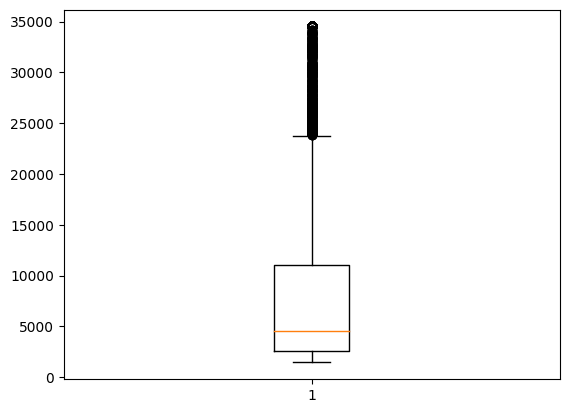

In [21]:
plt.boxplot(df['Credit_Limit'])

{'whiskers': [<matplotlib.lines.Line2D at 0x209a1843b90>,
 'caps': [<matplotlib.lines.Line2D at 0x209a16e0950>,
 'boxes': [<matplotlib.lines.Line2D at 0x2099ecdcb50>],
 'medians': [<matplotlib.lines.Line2D at 0x209a15a9450>],
 'fliers': [<matplotlib.lines.Line2D at 0x209a14ae590>],
 'means': []}

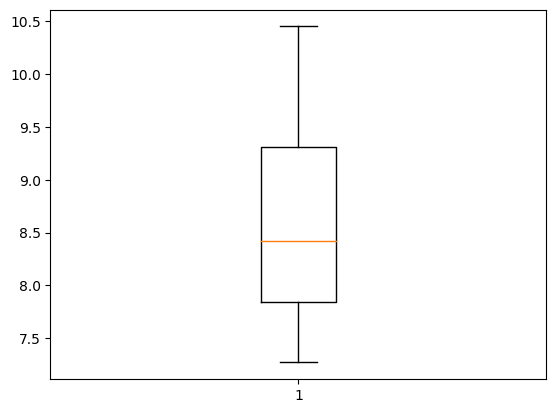

In [22]:
df['Credit_Limit'] = np.log(df['Credit_Limit'])
plt.boxplot(df['Credit_Limit'])

In [23]:
df.columns

Index(['ID_Customer', 'Customer_Age', 'Gender', 'Dependent_count',
       'Income_Category', 'Months_on_book', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Avg_Utilization_Ratio'],
      dtype='object')

### ¿Es necesario estandarizar los datos?


Sí, la estandarización de los datos es necesaria antes de aplicar el algoritmo K-Means, ya que este algoritmo es sensible a la magnitud de los datos. La estandarización asegura que cada característica contribuya equitativamente al resultado del análisis y mejora la convergencia del algoritmo.

## **Preparación de los datos** *(30 puntos)*

In [7]:
from sklearn.preprocessing import LabelEncoder

# Convertir variables categóricas a numéricas
# Para 'Gender' y 'Income_Category', utilizaremos Label Encoding
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Income_Category'] = label_encoder.fit_transform(data['Income_Category'])

# Usando el ID del cliente como índice en el DataFrame
data.set_index('ID_Customer', inplace=True)

# Análisis de la columna 'Income_Category'
# Dado que ya se ha convertido en una variable numérica, se analizará su distribución
income_category_analysis = data['Income_Category'].describe()

# Identificación de valores nulos
null_values = data.isnull().sum()

# Identificación y manejo de datos atípicos
# Seleccionaremos un enfoque de 3 desviaciones estándar para identificar atípicos
std_dev = 3
outliers = data.apply(lambda x: ((x - x.mean()).abs() > (std_dev * x.std())))
outliers_count = outliers.sum()

income_category_analysis, null_values, outliers_count

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# Limpieza de datos atípicos
columns_to_clean = ['Months_Inactive_12_mon',
                    'Contacts_Count_12_mon', 'Total_Trans_Amt']

for column in columns_to_clean:
    mean = data[column].mean()
    std = data[column].std()
    data = data[(data[column] > (mean - std_dev * std)) &
                (data[column] < (mean + std_dev * std))]

# Verificando el tamaño del DataFrame después de la limpieza
data_cleaned_size = data.shape

data_cleaned_size

NameError: name 'std_dev' is not defined